In [93]:
import pandas as pd
import networkx as nx

import socnet as sn

import matplotlib.pyplot as plt

df = pd.read_csv(r"refugees.csv")

df

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000
5,1951,Germany,Various/Unknown,Refugees (incl. refugee-like situations),265000
6,1951,Denmark,Various/Unknown,Refugees (incl. refugee-like situations),2000
7,1951,Spain,Various/Unknown,Refugees (incl. refugee-like situations),2000
8,1951,France,Various/Unknown,Refugees (incl. refugee-like situations),290000
9,1951,United Kingdom,Various/Unknown,Refugees (incl. refugee-like situations),208000


In [94]:
## Teste com o ano de 1970 sem valores indeterminados no csv

# G1970 = nx.Graph()

# for index, row in df.iterrows():
    
#     try:
        
#         weightr = float(row['Value'])
#         G1970.add_weighted_edges_from([(row['Origin'], row['Country / territory of asylum/residence'], int(weightr))])

#     except Exception as e:
#         pass
#         #print(e)
#        # print(row['Value'])

In [95]:
G1970 = nx.DiGraph()
G1980 = nx.DiGraph()
G1990 = nx.DiGraph()
G2000 = nx.DiGraph()
G2010 = nx.DiGraph()
G2017 = nx.DiGraph()


for index, row in df.iterrows():
    
    try:
        
        row['Value'] = int(row['Value'])/1
        
    except:
        
        row['Value'] = 0
        
    if row['Origin'] != 'Various/Unknown'  and int(row['Value']) > 1 :
        
        try:

            weightr = float(row['Value'])


            if row["Year"] == 1970:

                G1970.add_weighted_edges_from([(row['Origin'], row['Country / territory of asylum/residence'], int(weightr))])

            if row["Year"] == 1980:

                G1980.add_weighted_edges_from([(row['Origin'], row['Country / territory of asylum/residence'], int(weightr))])

            if row["Year"] == 1990:

                G1990.add_weighted_edges_from([(row['Origin'], row['Country / territory of asylum/residence'], int(weightr))])

            if row["Year"] == 2000:

                G2000.add_weighted_edges_from([(row['Origin'], row['Country / territory of asylum/residence'], int(weightr))])

            if row["Year"] == 2010:

                G2010.add_weighted_edges_from([(row['Origin'], row['Country / territory of asylum/residence'], int(weightr))])

            if row["Year"] == 2017:

                G2017.add_weighted_edges_from([(row['Origin'], row['Country / territory of asylum/residence'], int(weightr))])


        except Exception as e:

            pass


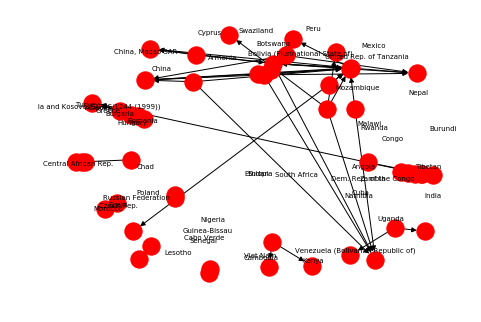

In [96]:
nx.draw(G1970)


pos = nx.spring_layout(G1970)
nx.draw_networkx_labels(G1970, pos, font_size=7, font_family='sans-serif')



plt.show()

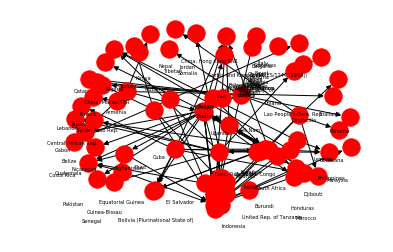

In [97]:
pos = nx.spring_layout(G1980)
nx.draw_networkx_labels(G1980, pos, font_size=5, font_family='sans-serif')
nx.draw(G1980)
plt.show()

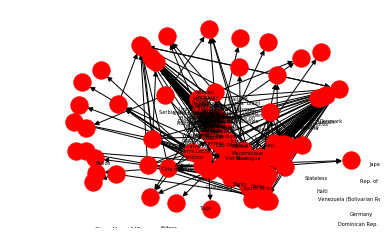

In [98]:
pos = nx.spring_layout(G1990)
nx.draw_networkx_labels(G1990, pos, font_size=5, font_family='sans-serif')
nx.draw(G1990)
plt.show()


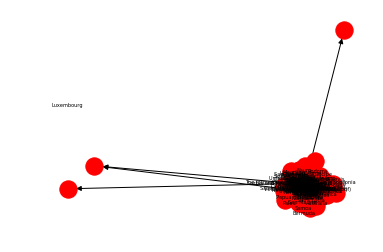

In [99]:
pos = nx.spring_layout(G2000)
nx.draw_networkx_labels(G2000, pos, font_size=5, font_family='sans-serif')
nx.draw(G2000)
plt.show()

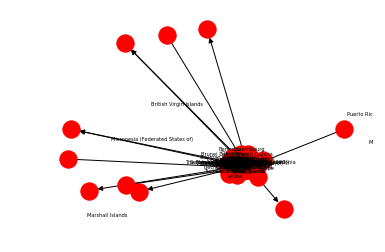

In [100]:
pos = nx.spring_layout(G2010)
nx.draw_networkx_labels(G2010, pos, font_size=5, font_family='sans-serif')
nx.draw(G2010)
plt.show()

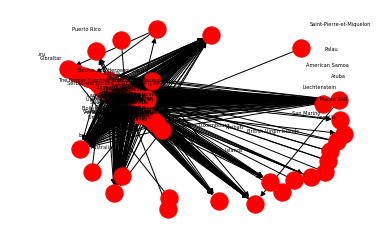

In [101]:
pos = nx.spring_layout(G2017)
nx.draw_networkx_labels(G2017, pos, font_size=5, font_family='sans-serif')
#nx.draw_networkx_edges(G2017, pos,arrowstyle='->')
nx.draw(G2017)
plt.show()

In [102]:
max_imigration_from_country = 0
max_imigration_from_country_name = ""
max_arrival = 0
dic = {}
max_indegree = 0
max_indegree_name = ""
max_outdegree = 0
max_outdegree_name = ""

#print(G1970.nodes) # DESTINY countries

for n in G1970.nodes: # vai analisar todas as emigrações para cada um dos países
    
    if G1970.in_degree(n) > max_indegree:
        max_indegree = G1970.in_degree(n)
        max_indegree_name = n
        
    if G1970.out_degree(n) > max_outdegree:
        max_outdegree = G1970.out_degree(n)
        max_outdegree_name = n
        
    total_arrival = 0
    for i in G1970[n]:
        if n != 'Various/Unknown':
            if i in dic:
                try:
                    dic[i].append(int(G1970[n][i]['weight']))
                except:
                    print("Erro ao adicionar no dicionário")
            else:
                dic[i] = []
            total_arrival += G1970[n][i]['weight']
            if G1970[n][i]['weight'] > max_imigration_from_country:
                max_imigration_from_country_name = n #Lugar de que mais saíram pessoas para um unico lugar
                max_imigration_from_country = G1970[n][i]['weight'] #numero de pessoas que mais sairam pessoas de um país para um só lugar
        if total_arrival > max_arrival:
            max_arrival = total_arrival
            max_arrival_country = n

max_emigrated = 0

for i in dic:
    
    if sum(dic[i]) > max_emigrated:
        max_emigrated = sum(dic[i])
        max_emigrated_name = i
        
total_pessoas_indegree = sum(dic[max_indegree_name])

In [103]:
print ("País que mais recebeu pessoas de um único país: " + str(max_imigration_from_country_name))
print ("Número de pessoas: " + str(max_imigration_from_country))

print("\n")

print("País que mais recebeu pessoas geral: " + max_arrival_country)
print("Número de pessoas: " + str(max_arrival))

print("\n")

print ("País que mais saiu pessoas: " + max_emigrated_name)
print ("Número de pessoas: " + str(max_emigrated))

print("\n")

print ("País que mais recebeu pessoas de lugares diferentes: " + max_indegree_name)
print ("Número de lugares: " + str(max_indegree) + " com o total de " + str(total_pessoas_indegree) + " pessoas")

print("\n")

print ("País que mais saiu pessoas para lugares diferentes: " + max_outdegree_name)
print ("Número de lugares: " + str(max_outdegree))

País que mais recebeu pessoas de um único país: Angola
Número de pessoas: 400000


País que mais recebeu pessoas geral: Angola
Número de pessoas: 414120


País que mais saiu pessoas: Dem. Rep. of the Congo
Número de pessoas: 459000


País que mais recebeu pessoas de lugares diferentes: Zambia
Número de lugares: 5 com o total de 6020 pessoas


País que mais saiu pessoas para lugares diferentes: Dem. Rep. of the Congo
Número de lugares: 5


In [104]:
max_imigration_from_country = 0
max_imigration_from_country_name = ""
max_arrival = 0
max_indegree = 0
max_indegree_name = ""
max_outdegree = 0
max_outdegree_name = ""


dic = {}

#print(G1980.nodes) # DESTINY countries

for n in G1980.nodes: # vai analisar todas as emigrações para cada um dos países
    
    if G1980.in_degree(n) > max_indegree:
        max_indegree = G1980.in_degree(n)
        max_indegree_name = n
        
    if G1980.out_degree(n) > max_outdegree:
        max_outdegree = G1980.out_degree(n)
        max_outdegree_name = n
        
    total_arrival = 0
    for i in G1980[n]:
        if n != 'Various/Unknown':
            if i in dic:
                try:
                    dic[i].append(int(G1980[n][i]['weight']))
                except:
                    print("Erro ao adicionar no dicionário")
            else:
                dic[i] = []
            total_arrival += G1980[n][i]['weight']
            if G1980[n][i]['weight'] > max_imigration_from_country:
                max_imigration_from_country_name = n #Lugar de que mais saíram pessoas para um unico lugar
                max_imigration_from_country = G1980[n][i]['weight'] #numero de pessoas que mais sairam pessoas de um país para um só lugar
        if total_arrival > max_arrival:
            max_arrival = total_arrival
            max_arrival_country = n
        #max_emigration = G1980[n][i]['weight'] #Numero de pessoas que saíram

max_emigrated = 0
for i in dic:
    if sum(dic[i]) > max_emigrated:
        max_emigrated = sum(dic[i])
        max_emigrated_name = i
        
total_pessoas_indegree = sum(dic[max_indegree_name])

In [105]:
print ("País que mais recebeu pessoas de um único país: " + str(max_imigration_from_country_name))
print ("Número de pessoas: " + str(max_imigration_from_country))

print("\n")

print("País que mais recebeu pessoas geral: " + max_arrival_country)
print("Número de pessoas: " + str(max_arrival))

print("\n")

print ("País que mais saiu pessoas: " + max_emigrated_name)
print ("Número de pessoas: " + str(max_emigrated))

print("\n")

print ("País que mais recebeu pessoas de lugares diferentes: " + max_indegree_name)
print ("Número de lugares: " + str(max_indegree) + " com o total de " + str(total_pessoas_indegree) + " pessoas")

print("\n")

print ("País que mais saiu pessoas para lugares diferentes: " + max_outdegree_name)
print ("Número de lugares: " + str(max_outdegree))

País que mais recebeu pessoas de um único país: Ethiopia
Número de pessoas: 2000000


País que mais recebeu pessoas geral: Ethiopia
Número de pessoas: 2567998


País que mais saiu pessoas: Sudan
Número de pessoas: 488000


País que mais recebeu pessoas de lugares diferentes: Italy
Número de lugares: 43 com o total de 17756 pessoas


País que mais saiu pessoas para lugares diferentes: Ethiopia
Número de lugares: 15


In [106]:
max_imigration_from_country = 0
max_imigration_from_country_name = ""
max_arrival = 0
max_indegree = 0
max_indegree_name = ""
max_outdegree = 0
max_outdegree_name = ""


dic = {}

#print(G1990.nodes) # DESTINY countries

for n in G1990.nodes: # vai analisar todas as emigrações para cada um dos países
    
    if G1990.in_degree(n) > max_indegree:
        max_indegree = G1990.in_degree(n)
        max_indegree_name = n
        
    if G1990.out_degree(n) > max_outdegree:
        max_outdegree = G1990.out_degree(n)
        max_outdegree_name = n        

    total_arrival = 0
    for i in G1990[n]:
        if n != 'Various/Unknown':
            if i in dic:
                try:
                    dic[i].append(int(G1990[n][i]['weight']))
                except:
                    print("Erro ao adicionar no dicionário")
            else:
                dic[i] = []
            total_arrival += G1990[n][i]['weight']
            if G1990[n][i]['weight'] > max_imigration_from_country:
                max_imigration_from_country_name = n #Lugar de que mais saíram pessoas para um unico lugar
                max_imigration_from_country = G1990[n][i]['weight'] #numero de pessoas que mais sairam pessoas de um país para um só lugar
        if total_arrival > max_arrival:
            max_arrival = total_arrival
            max_arrival_country = n
    

max_emigrated = 0
for i in dic:
    if sum(dic[i]) > max_emigrated:
        max_emigrated = sum(dic[i])
        max_emigrated_name = i
        
total_pessoas_indegree = sum(dic[max_indegree_name])

In [107]:
print ("País que mais recebeu pessoas de um único país: " + str(max_imigration_from_country_name))
print ("Número de pessoas: " + str(max_imigration_from_country))

print("\n")

print("País que mais recebeu pessoas geral: " + max_arrival_country)
print("Número de pessoas: " + str(max_arrival))

print("\n")

print ("País que mais saiu pessoas: " + max_emigrated_name)
print ("Número de pessoas: " + str(max_emigrated))

print("\n")

print ("País que mais recebeu pessoas de lugares diferentes: " + max_indegree_name)
print ("Número de lugares: " + str(max_indegree) + " com o total de " + str(total_pessoas_indegree) + " pessoas")

print("\n")

print ("País que mais saiu pessoas para lugares diferentes: " + max_outdegree_name)
print ("Número de lugares: " + str(max_outdegree))

País que mais recebeu pessoas de um único país: Afghanistan
Número de pessoas: 3061110


País que mais recebeu pessoas geral: Afghanistan
Número de pessoas: 3095729


País que mais saiu pessoas: Iran (Islamic Rep. of)
Número de pessoas: 1113291


País que mais recebeu pessoas de lugares diferentes: Sweden
Número de lugares: 71 com o total de 102697 pessoas


País que mais saiu pessoas para lugares diferentes: Somalia
Número de lugares: 15


In [108]:
max_imigration_from_country = 0
max_imigration_from_country_name = ""
max_arrival = 0
max_indegree = 0
max_indegree_name = ""
max_outdegree = 0
max_outdegree_name = ""


dic = {}

# DESTINY countries

for n in G2000.nodes: # vai analisar todas as emigrações para cada um dos países
    
    total_arrival = 0
    
    if G2000.in_degree(n) > max_indegree:
        max_indegree = G2000.in_degree(n)
        max_indegree_name = n
        
    if G2000.out_degree(n) > max_outdegree:
        max_outdegree = G2000.out_degree(n)
        max_outdegree_name = n
        
    for i in G2000[n]:
        if n != 'Various/Unknown':
            if i in dic:
                try:
                    dic[i].append(int(G2000[n][i]['weight']))
                except:
                    print("Erro ao adicionar no dicionário")
            else:
                dic[i] = []
            total_arrival += G2000[n][i]['weight']
            if G2000[n][i]['weight'] > max_imigration_from_country:
                max_imigration_from_country_name = n #Lugar de que mais saíram pessoas para um unico lugar
                max_imigration_from_country = G2000[n][i]['weight'] #numero de pessoas que mais sairam pessoas de um país para um só lugar
        if total_arrival > max_arrival:
            max_arrival = total_arrival
            max_arrival_country = n
        #max_emigration = G2000[n][i]['weight'] #Numero de pessoas que saíram

max_emigrated = 0
for i in dic:
    if sum(dic[i]) > max_emigrated:
        max_emigrated = sum(dic[i])
        max_emigrated_name = i

total_pessoas_indegree = sum(dic[max_indegree_name])

In [109]:
print ("País que mais recebeu pessoas de um único país: " + str(max_imigration_from_country_name))
print ("Número de pessoas: " + str(max_imigration_from_country))

print("\n")

print("País que mais recebeu pessoas geral: " + max_arrival_country)
print("Número de pessoas: " + str(max_arrival))

print("\n")

print ("País que mais saiu pessoas: " + max_emigrated_name)
print ("Número de pessoas: " + str(max_emigrated))

print("\n")

print ("País que mais recebeu pessoas de lugares diferentes: " + max_indegree_name)
print ("Número de lugares: " + str(max_indegree) + " com o total de " + str(total_pessoas_indegree) + " pessoas")

print("\n")

print ("País que mais saiu pessoas para lugares diferentes: " + max_outdegree_name)
print ("Número de lugares: " + str(max_outdegree))

País que mais recebeu pessoas de um único país: Eritrea
Número de pessoas: 1100000


País que mais recebeu pessoas geral: Eritrea
Número de pessoas: 1158068


País que mais saiu pessoas: Eritrea
Número de pessoas: 1101258


País que mais recebeu pessoas de lugares diferentes: United States of America
Número de lugares: 180 com o total de 295068 pessoas


País que mais saiu pessoas para lugares diferentes: Somalia
Número de lugares: 97


In [110]:
max_imigration_from_country = 0
max_imigration_from_country_name = ""
max_arrival = 0
max_indegree = 0
max_indegree_name = ""
max_outdegree = 0
max_outdegree_name = ""


dic = {}

#print(G2010.nodes) # DESTINY countries

for n in G2010.nodes: # vai analisar todas as emigrações para cada um dos países
    
    if G2010.in_degree(n) > max_indegree:
        max_indegree = G2010.in_degree(n)
        max_indegree_name = n
        
    if G2010.out_degree(n) > max_outdegree:
        max_outdegree = G2010.out_degree(n)
        max_outdegree_name = n
        
        
    total_arrival = 0
    for i in G2010[n]:
        if n != 'Various/Unknown':
            if i in dic:
                try:
                    dic[i].append(int(G2010[n][i]['weight']))
                except:
                    print("Erro ao adicionar no dicionário")
            else:
                dic[i] = []
            total_arrival += G2010[n][i]['weight']
            if G2010[n][i]['weight'] > max_imigration_from_country:
                max_imigration_from_country_name = n #Lugar de que mais saíram pessoas para um unico lugar
                max_imigration_from_country = G2010[n][i]['weight'] #numero de pessoas que mais sairam pessoas de um país para um só lugar
        if total_arrival > max_arrival:
            max_arrival = total_arrival
            max_arrival_country = n
        #max_emigration = G2010[n][i]['weight'] #Numero de pessoas que saíram

max_emigrated = 0
for i in dic:
    if sum(dic[i]) > max_emigrated:
        max_emigrated = sum(dic[i])
        max_emigrated_name = i
        
total_pessoas_indegree = sum(dic[max_indegree_name])

In [111]:
print ("País que mais recebeu pessoas de um único país: " + str(max_imigration_from_country_name))
print ("Número de pessoas: " + str(max_imigration_from_country))

print("\n")

print("País que mais recebeu pessoas geral: " + max_arrival_country)
print("Número de pessoas: " + str(max_arrival))

print("\n")

print ("País que mais saiu pessoas: " + max_emigrated_name)
print ("Número de pessoas: " + str(max_emigrated))

print("\n")

print ("País que mais recebeu pessoas de lugares diferentes: " + max_indegree_name)
print ("Número de lugares: " + str(max_indegree) + " com o total de " + str(total_pessoas_indegree) + " pessoas")

print("\n")

print ("País que mais saiu pessoas para lugares diferentes: " + max_outdegree_name)
print ("Número de lugares: " + str(max_outdegree))

País que mais recebeu pessoas de um único país: Somalia
Número de pessoas: 1463780


País que mais recebeu pessoas geral: Somalia
Número de pessoas: 1696293


País que mais saiu pessoas: Somalia
Número de pessoas: 1465691


País que mais recebeu pessoas de lugares diferentes: United States of America
Número de lugares: 190 com o total de 238089 pessoas


País que mais saiu pessoas para lugares diferentes: Somalia
Número de lugares: 123


In [112]:
max_imigration_from_country = 0
max_imigration_from_country_name = ""
max_arrival = 0
max_indegree = 0
max_indegree_name = ""
max_outdegree = 0
max_outdegree_name = ""


dic = {}

#print(G2017.nodes) # DESTINY countries

for n in G2017.nodes: # vai analisar todas as emigrações para cada um dos países
    
    if G2017.in_degree(n) > max_indegree:
        max_indegree = G2017.in_degree(n)
        max_indegree_name = n
        
    if G2017.out_degree(n) > max_outdegree:
        max_outdegree = G2017.out_degree(n)
        max_outdegree_name = n
        
        
    total_arrival = 0
    for i in G2017[n]:
        if n != 'Various/Unknown':
            if i in dic:
                
                try:
                    dic[i].append(int(G2017[n][i]['weight']))
                    
                except:
                    print("Erro ao adicionar no dicionário")
            else:
                
                dic[i] = []
            total_arrival += G2017[n][i]['weight']
            
            if G2017[n][i]['weight'] > max_imigration_from_country:
                max_imigration_from_country_name = n #Lugar de que mais saíram pessoas para um unico lugar
                max_imigration_from_country = G2017[n][i]['weight'] #numero de pessoas que mais sairam pessoas de um país para um só lugar
                
        if total_arrival > max_arrival:
            max_arrival = total_arrival
            max_arrival_country = n
        #max_emigration = G2017[n][i]['weight'] #Numero de pessoas que saíram

max_emigrated = 0
for i in dic:
    if sum(dic[i]) > max_emigrated:
        max_emigrated = sum(dic[i])
        max_emigrated_name = i
        
total_pessoas_indegree = sum(dic[max_indegree_name])

In [113]:
print ("País que mais recebeu pessoas de um único país: " + str(max_imigration_from_country_name))
print ("Número de pessoas: " + str(max_imigration_from_country))

print("\n")

print("País que mais recebeu pessoas geral: " + max_arrival_country)
print("Número de pessoas: " + str(max_arrival))

print("\n")

print ("País que mais saiu pessoas: " + max_emigrated_name)
print ("Número de pessoas: " + str(max_emigrated))

print("\n")

print ("País que mais recebeu pessoas de lugares diferentes: " + max_indegree_name)
print ("Número de lugares: " + str(max_indegree) + " com o total de " + str(total_pessoas_indegree) + " pessoas")

print("\n")

print ("País que mais saiu pessoas para lugares diferentes: " + max_outdegree_name)
print ("Número de lugares: " + str(max_outdegree))

País que mais recebeu pessoas de um único país: Syrian Arab Rep.
Número de pessoas: 3424237


País que mais recebeu pessoas geral: Syrian Arab Rep.
Número de pessoas: 6385872


País que mais saiu pessoas: Turkey
Número de pessoas: 3480444


País que mais recebeu pessoas de lugares diferentes: United States of America
Número de lugares: 188 com o total de 278370 pessoas


País que mais saiu pessoas para lugares diferentes: Syrian Arab Rep.
Número de lugares: 135
